# Video games market analysis

**Short description**

As part of this research, we deal with data about video games - data on game sales, user and expert ratings, genres and platforms.

**Data description** 
* `Name` — name of game
* `Platform` — platform
* `Year_of_Release` — year of release
* `Genre` — genre of game
* `NA_sales` — sales in Northern America (millions of purchased copies)
* `EU_sales` — sales in Europe (millions of purchased copies)
* `JP_sales` — sales in Japan (millions of purchased copies)
* `Other_sales` — sales in other countries (millions of purchased copies)
* `Critic_Score` — critics' score (maximum 100)
* `User_Score` — users' score (maximum 10)
* `Rating` — rating from ESRB (Entertainment Software Rating Board). ESRB evaluates game's content and assigns appropriate age categories, such as Teen and Mature.

Data for 2016 may be incomplete.

**Goal:** to plan new campaigns for 2017.

**Tasks:** 
- analyze data
- identify the determining patterns of game success.

We will analyze data from the games.csv dataset. The work plan looks as follows:

1. Data exploration
2. Data preprocessing
3. Exploratory data analysis
4. Formation of a portrait of the user for each region
5. Hypothesis testing
6. Final conclusion.

## Data exploration

Loading all the packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/Users/aasheremeeva/Desktop/All DS Projects/video games/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Data preprocessing

Changing the capitalization of the column names to standardize the dataframe.

In [4]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Let's see which variables contain missing data and to what extent.

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


There are missing variables in year_of_release, critic_score, user_score, and rating. Critic_score has the highest percentage of missing values.

Let's check what parameters the variable "user_score" contains.

In [7]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Replace the parameter 'tbd' with 'nan'.

In [8]:
data['user_score'] = data['user_score'].replace('tbd','nan')
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'nan', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**What to do with the missing values**:

- There are only 2 rows with zero values for the parameter 'name', which can simply be deleted;
- There are missing values in the columns with scores, but if we replace them with means or medians, it will significantly distort the conclusions.

The number of missing values represents a significant proportion of the total values in the dataset. If we delete values with missing data, we will lose potentially valuable information for further research.


Let's see what data type the variables in the dataset have for a video games market analysis.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The variable critic_score is more suited to an integer format in terms of meaning. Let's convert it.
The variable user_score contains decimal numbers, which corresponds to the float type. Let's also convert it.
Let's also convert the year_of_release variable to an integer format.

In [10]:
data['year_of_release'] = data['year_of_release'].astype('int', errors='ignore')
data['critic_score'] = data['critic_score'].astype('int', errors='ignore')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Checking the data for any obvious duplicates.

In [12]:
data.duplicated().sum()

0

No obvious duplicates were found.

Finding the total sales in all regions and create a separate column for them.

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [14]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


## Data analysis

Assessment of the number of games released in different years.

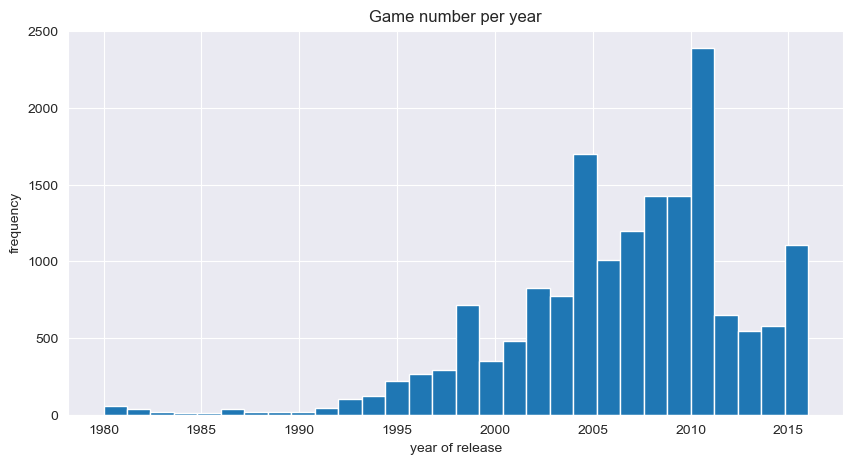

In [30]:
data["year_of_release"].hist(bins=30, figsize=(10,5))
plt.xlabel('year of release')
plt.ylabel('frequency')
plt.title('Game number per year')
plt.show()

From 1980 to 1993, the number of games released was relatively small (less than 100 games). Therefore, these data can be discarded for further work.

Now let's evaluate how sales have changed by platforms.
First, finding the platforms with the highest total sales.

In [31]:
pltf_sales = data.pivot_table(index='platform', values='total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False)
pltf_sales

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


The top 5 platforms for total sales include: PS2, X360, PS3, Wii, DS.

How sales have changed for each platform:

In [32]:
PS2_sales = data[data['platform'] == 'PS2'].pivot_table(index='year_of_release', values = 'total_sales', aggfunc='sum')
X360_sales = data[data['platform'] == 'X360'].pivot_table(index='year_of_release', values = 'total_sales', aggfunc='sum')
PS3_sales = data[data['platform'] == 'PS3'].pivot_table(index='year_of_release', values = 'total_sales', aggfunc='sum')
Wii_sales = data[data['platform'] == 'Wii'].pivot_table(index='year_of_release', values = 'total_sales', aggfunc='sum')
DS_sales = data[data['platform'] == 'DS'].pivot_table(index='year_of_release', values = 'total_sales', aggfunc='sum')

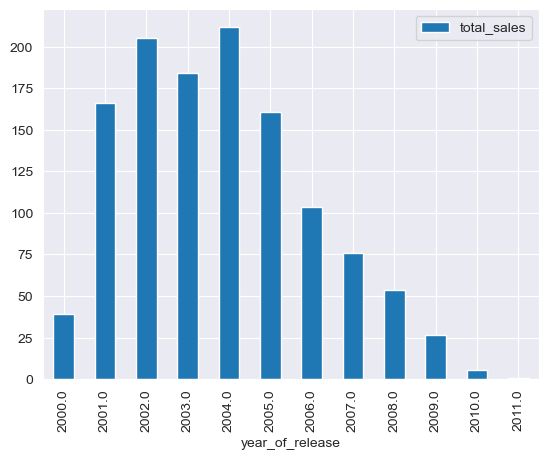

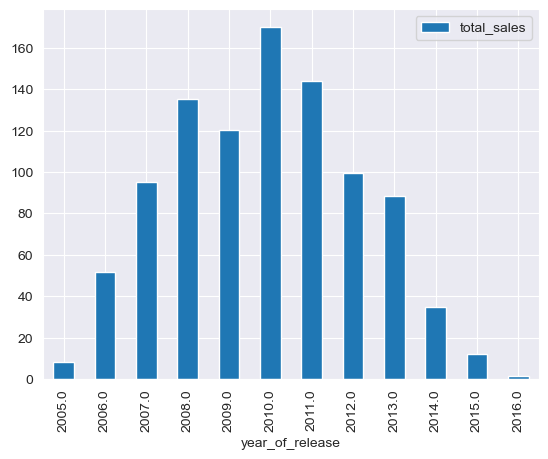

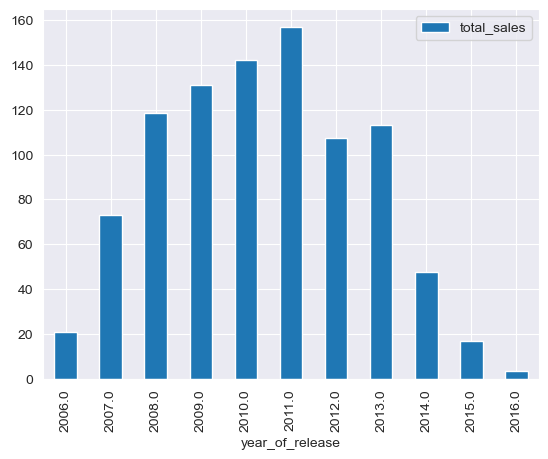

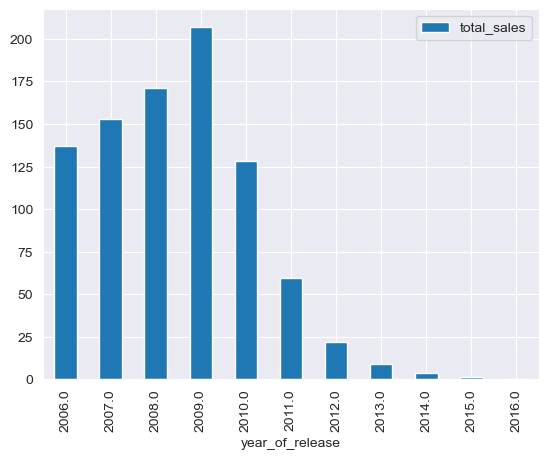

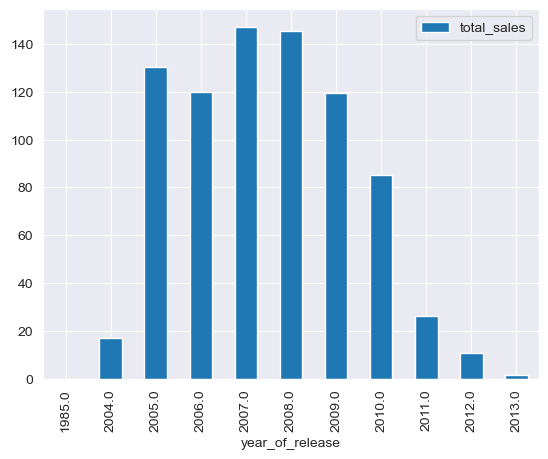

In [33]:
PS2_sales.plot(kind='bar', grid = True)
plt.show()
X360_sales.plot(kind='bar', grid = True)
plt.show()
PS3_sales.plot(kind='bar', grid = True)
plt.show()
Wii_sales.plot(kind='bar', grid = True)
plt.show()
DS_sales.plot(kind='bar', grid = True)
plt.show()

On average, platforms live for 10 years. Usually, there is a rapid increase in their popularity and sales during the first 5 years, followed by a decline over the next 5 years, and eventually they become obsolete. Based on this, we will use the most relevant data for further analysis starting from 2014.

Посмотрим на то, как менялись продажи остальных платформ за выбранный период.

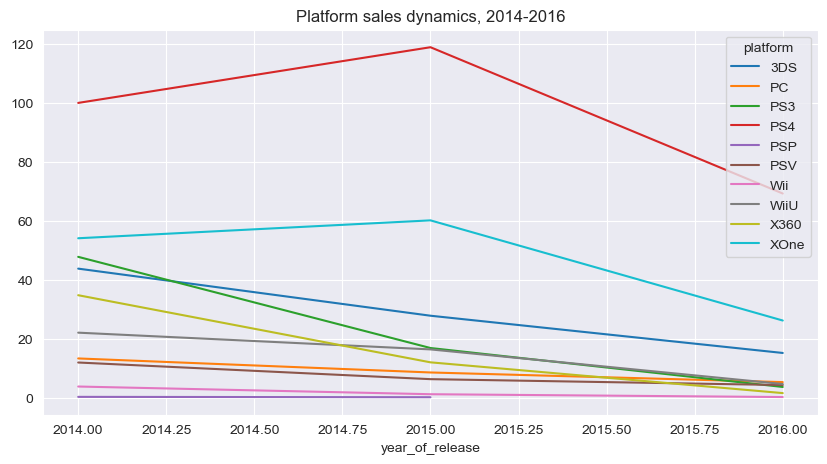

In [35]:
(data.loc[data['year_of_release'] > 2013]
    .pivot_table(index='year_of_release', values='total_sales', columns = 'platform',aggfunc='sum')
    .plot(grid=True, title = 'Platform sales dynamics, 2014-2016',figsize=(10,5))
)
plt.show()

For the reviewed period 6 platforms with "significant" sales can be identified: PS4, PS3, X360, 3DS, XOne, WiiU. However, in terms of potential profitability, the PS4 and 3DS platforms can be distinguished.

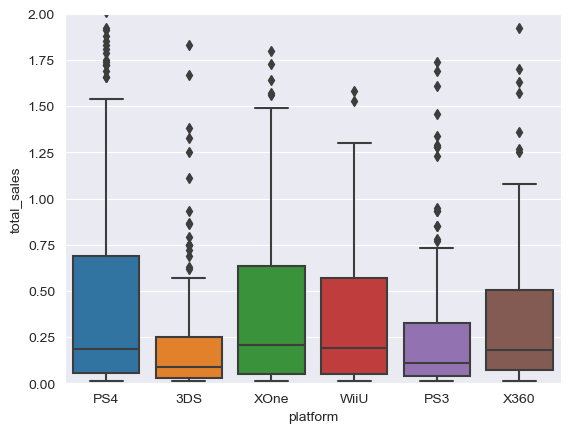

In [36]:
data_sales_5y = data.query('year_of_release > 2013 and platform == ["PS4", "PS3", "X360", "3DS", "XOne", "WiiU"]')
data_boxes = sns.boxplot(x = data_sales_5y['platform'], y = data_sales_5y['total_sales'])
plt.ylim(0,2) 
plt.show()

On the "box and whisker" chart, we can see that the median of supposedly profitable platforms is slightly lower than other industry leaders. All platforms have a significant number of outliers.

Double-check the data type of the new slice and convert incorrect variable types (object).

In [37]:
data_sales_5y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 31 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1219 non-null   object 
 1   platform         1219 non-null   object 
 2   year_of_release  1219 non-null   float64
 3   genre            1219 non-null   object 
 4   na_sales         1219 non-null   float64
 5   eu_sales         1219 non-null   float64
 6   jp_sales         1219 non-null   float64
 7   other_sales      1219 non-null   float64
 8   critic_score     548 non-null    float64
 9   user_score       691 non-null    float64
 10  rating           740 non-null    object 
 11  total_sales      1219 non-null   float64
dtypes: float64(8), object(4)
memory usage: 123.8+ KB


In [38]:
data_sales_5y['user_score'] = pd.to_numeric(data_sales_5y['user_score'], errors='coerce')

/var/folders/s9/2dhk92k53t10g5010dcth9r80000gn/T/ipykernel_34125/2554667806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales_5y['user_score'] = pd.to_numeric(data_sales_5y['user_score'], errors='coerce')


Next, we will take the PS4 platform and evaluate how user and critic reviews affect its sales in the video games market analysis.

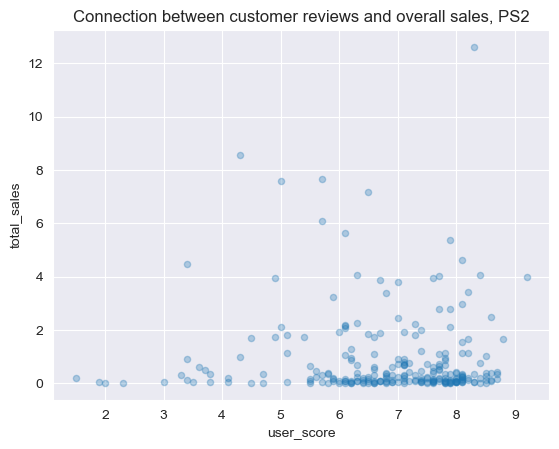

In [39]:
data_sales_5y.loc[data_sales_5y['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha =.3,
                   title = 'Connection between customer reviews and overall sales, PS2')
plt.show()

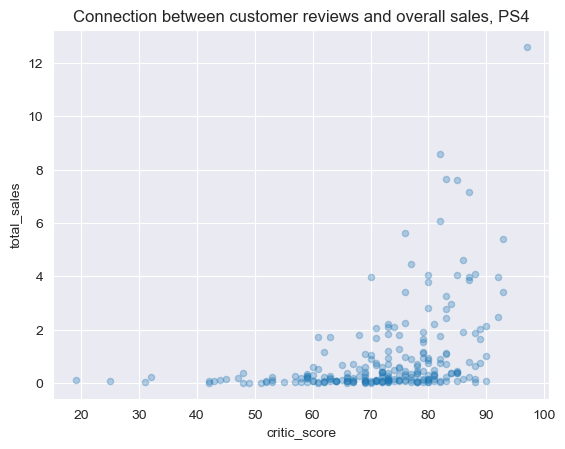

In [40]:
data_sales_5y.loc[data_sales_5y['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha =.3,
                   title = 'Connection between customer reviews and overall sales, PS4')
plt.show()

In [41]:
(data_sales_5y.loc[data_sales_5y['platform'] == 'PS4']
    .pivot_table(index='name',values=['total_sales','user_score','critic_score']).corr()
)

,critic_score,total_sales,user_score
critic_score,1.000000,0.402661,0.546434
total_sales,0.402661,1.000000,-0.040132
user_score,0.546434,-0.040132,1.000000


Based on the obtained graphs and correlation coefficients, it can be said that there is a weak positive correlation between overall sales and critic ratings, but the correlation with customer reviews is very weak and practically non-existent.

Now let's take a look at how critic and consumer ratings impact sales for other platforms (PS3, Xbox 360, 3DS, Xbox One, Wii U).

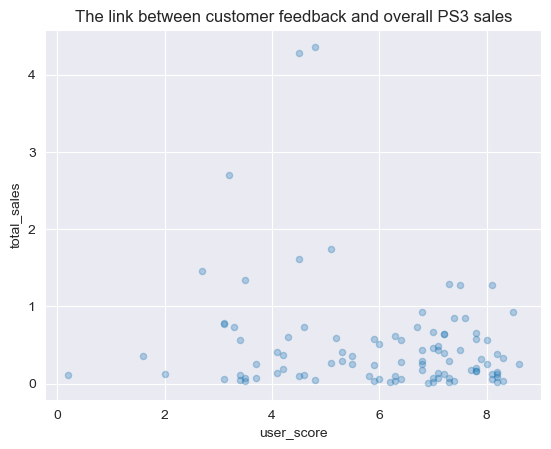

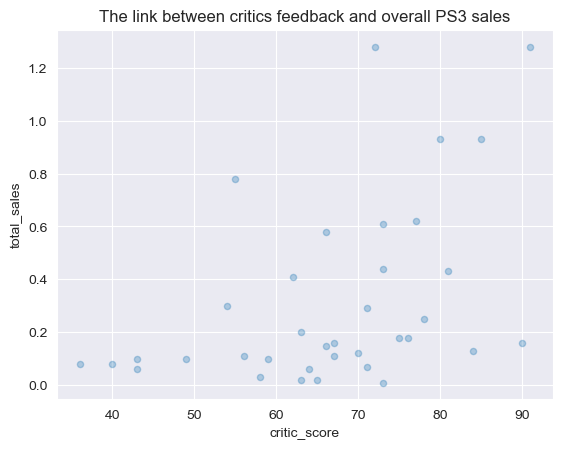

,critic_score,total_sales,user_score
critic_score,1.000000,0.446575,0.693445
total_sales,0.446575,1.000000,-0.166761
user_score,0.693445,-0.166761,1.000000


In [42]:
#PS3
data_sales_5y.loc[data_sales_5y['platform'] == 'PS3'].plot(x='user_score', y='total_sales', kind='scatter', alpha =.3,
                   title = 'The link between customer feedback and PS3 total sales')
data_sales_5y.loc[data_sales_5y['platform'] == 'PS3'].plot(x='critic_score', y='total_sales', kind='scatter', alpha =.3,
                   title = 'The link between critics feedback and PS3 total sales')
plt.show()

(data_sales_5y.loc[data_sales_5y['platform'] == 'PS3']
    .pivot_table(index='name',values=['total_sales','user_score','critic_score']).corr()
)

For the PS3, the situation is exactly the same as for the PS4.

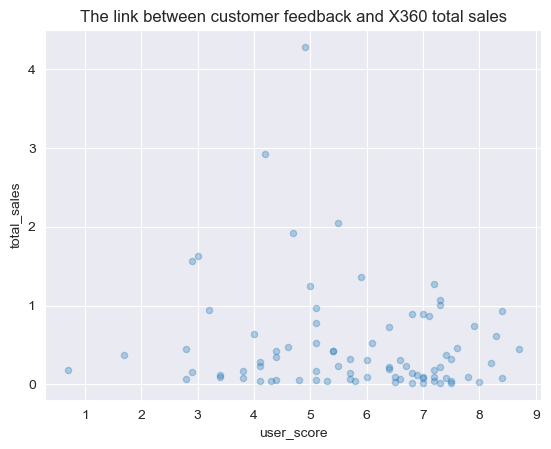

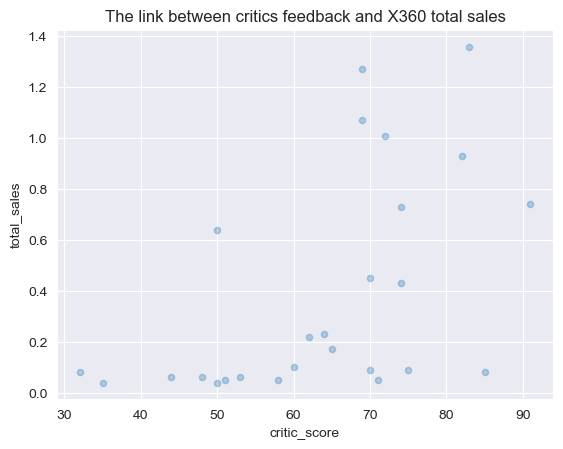

,critic_score,total_sales,user_score
critic_score,1.000000,0.525723,0.625309
total_sales,0.525723,1.000000,-0.138445
user_score,0.625309,-0.138445,1.000000


In [43]:
#X360
data_sales_5y.loc[data_sales_5y['platform'] == 'X360'].plot(x='user_score', y='total_sales', kind='scatter', alpha =.3,
                   title = 'The link between customer feedback and X360 total sales')
data_sales_5y.loc[data_sales_5y['platform'] == 'X360'].plot(x='critic_score', y='total_sales', kind='scatter', alpha =.3,
                   title = 'The link between critics feedback and X360 total sales')
plt.show()

(data_sales_5y.loc[data_sales_5y['platform'] == 'X360']
    .pivot_table(index='name',values=['total_sales','user_score','critic_score']).corr()
)

Once again, a similar situation with the correlation of both types of reviews and sales for the X360.

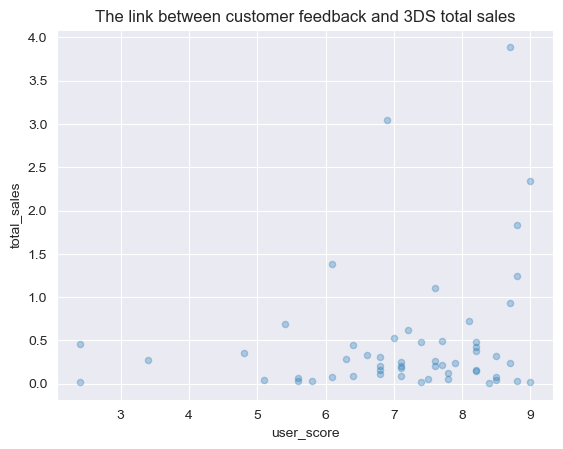

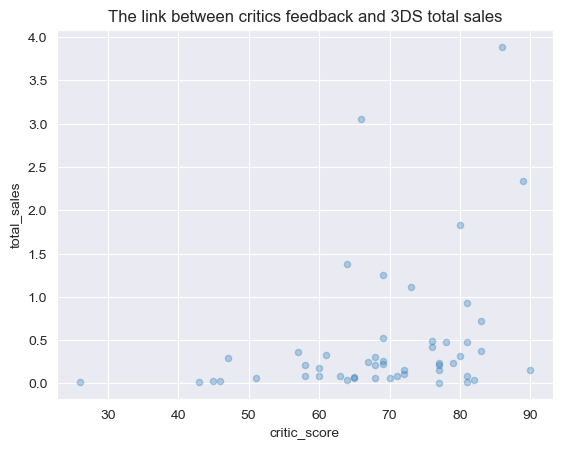

,critic_score,total_sales,user_score
critic_score,1.000000,0.314117,0.862485
total_sales,0.314117,1.000000,0.215193
user_score,0.862485,0.215193,1.000000


In [44]:
#3DS
data_sales_5y.loc[data_sales_5y['platform'] == '3DS'].plot(x='user_score', y='total_sales', kind='scatter', alpha =.3,
                   title = 'The link between customer feedback and 3DS total sales')
data_sales_5y.loc[data_sales_5y['platform'] == '3DS'].plot(x='critic_score', y='total_sales', kind='scatter', alpha =.3,
                   title = 'The link between critics feedback and 3DS total sales')
plt.show()

(data_sales_5y.loc[data_sales_5y['platform'] == '3DS']
    .pivot_table(index='name',values=['total_sales','user_score','critic_score']).corr()
)

For the 3DS platform, there is still a weak (0.3) and very weak (0.19) positive relationship for critical and customer feedback, respectively.

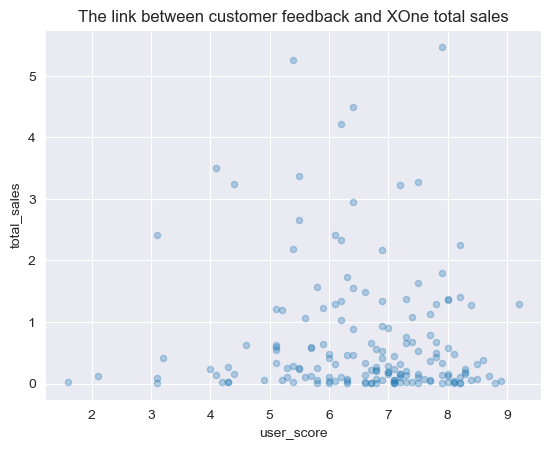

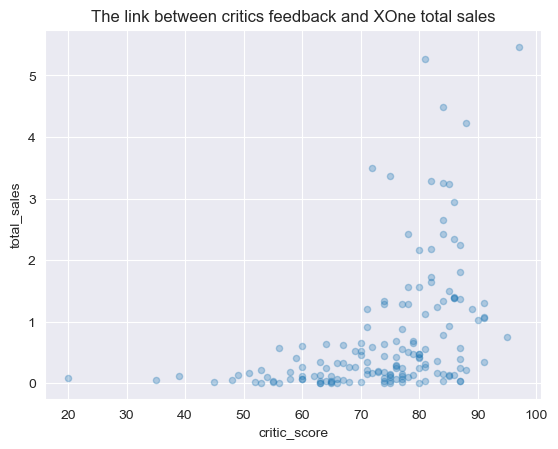

,critic_score,total_sales,user_score
critic_score,1.000000,0.428677,0.440977
total_sales,0.428677,1.000000,-0.070384
user_score,0.440977,-0.070384,1.000000


In [45]:
#XOne
data_sales_5y.loc[data_sales_5y['platform'] == 'XOne'].plot(x='user_score', y='total_sales', kind='scatter', alpha =.3,
                   title = 'The link between customer feedback and XOne total sales')
data_sales_5y.loc[data_sales_5y['platform'] == 'XOne'].plot(x='critic_score', y='total_sales', kind='scatter', alpha =.3,
                   title = 'The link between critics feedback and XOne total sales')
plt.show()

(data_sales_5y.loc[data_sales_5y['platform'] == 'XOne']
    .pivot_table(index='name',values=['total_sales','user_score','critic_score']).corr()
)

Уже повыше, но все еще слабая положительная корреляция наблюдается между отзывами критиков и продажами для XOne, 
при этом почти нулевая связь сохраняется с отзывами покупателей.

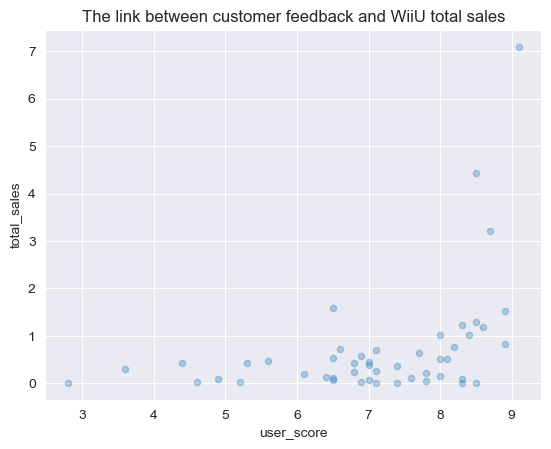

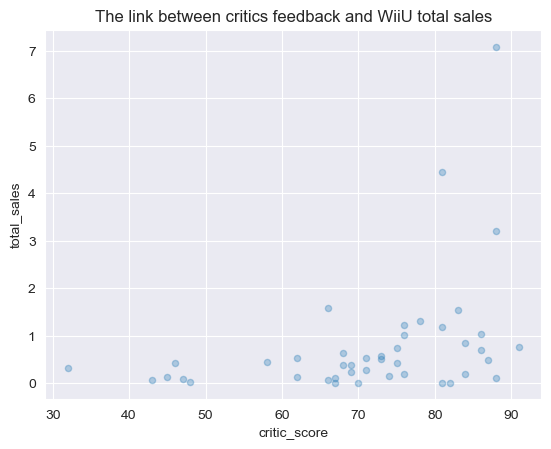

,critic_score,total_sales,user_score
critic_score,1.000000,0.370201,0.763536
total_sales,0.370201,1.000000,0.407926
user_score,0.763536,0.407926,1.000000


In [46]:
#WiiU
data_sales_5y.loc[data_sales_5y['platform'] == 'WiiU'].plot(x='user_score', y='total_sales', kind='scatter', alpha =.3,
                   title = 'The link between customer feedback and WiiU total sales')
data_sales_5y.loc[data_sales_5y['platform'] == 'WiiU'].plot(x='critic_score', y='total_sales', kind='scatter', alpha =.3,
                   title = 'The link between critics feedback and WiiU total sales')
plt.show()

(data_sales_5y.loc[data_sales_5y['platform'] == 'WiiU']
    .pivot_table(index='name',values=['total_sales','user_score','critic_score']).corr()
)

The WiiU platform, on the other hand, has a near-to-average positive correlation between customer reviews and sales (0.4), while critical reviews still correlate with sales at a weak level (~0.35).

Let's look at the overall distribution of games by genre.

In [48]:
data_act = data.query('year_of_release > 2013')

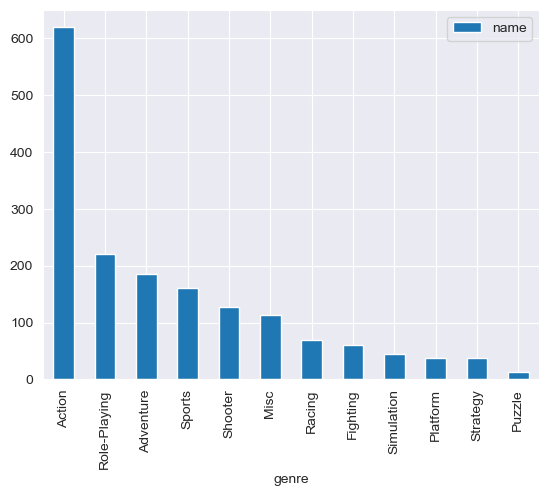

In [49]:
genres_plays = data_act.pivot_table(index='genre', values = 'name', aggfunc='count').sort_values(by='name', ascending=False)
genres_plays.plot(kind='bar', grid = True)
plt.show()

According to the plot you can see that the top 3 genres by number of games are Action, Role-Playing and Adventure. 

Now let's look at the profitability of genres: consider all genres in terms of median total sales.

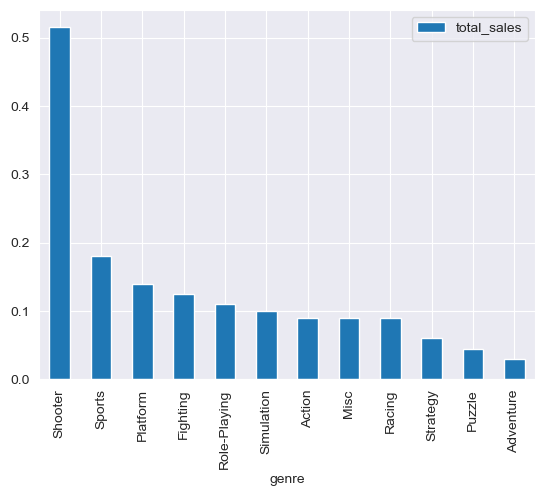

In [50]:
genres_sales = data_act.pivot_table(index='genre', values = 'total_sales', aggfunc='median').sort_values(by ='total_sales', ascending=False)
genres_sales.plot(kind='bar', grid = True)
plt.show()

In terms of profitability, the Shooter genre leads the way. The Sports and Platform genres rank 2nd and 3rd in terms of sales. However, Adventure, Puzzle and Strategy are the worst performing genres in terms of profitability.

## Generating a user profile for each region

For the user of each region will find (*NA, EU, JP*):

- The most popular platforms (top 5). Describe the differences in sales shares.
- The most popular genres (top 5). Explain the differences.
- Does the ESRB rating affect sales in a particular region?


Visualising total sales by platform in the NA, EU, JP regions.

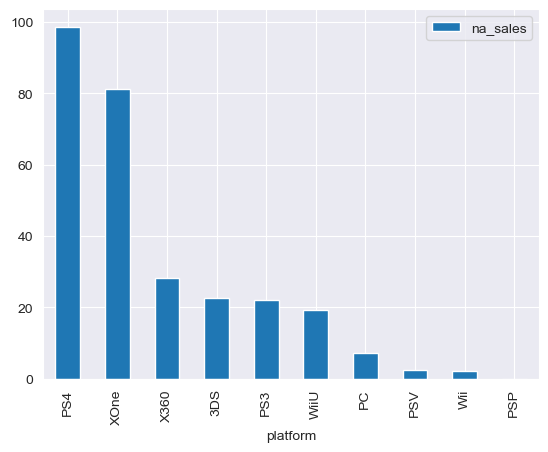

In [51]:
platforms_na = data_act.pivot_table(index='platform', values = 'na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)
platforms_na.plot(kind='bar', grid = True)
plt.show()

In the NA region, the PS4 and XOne platforms lead the way. The PSP, meanwhile, is in the outsiders' tier.

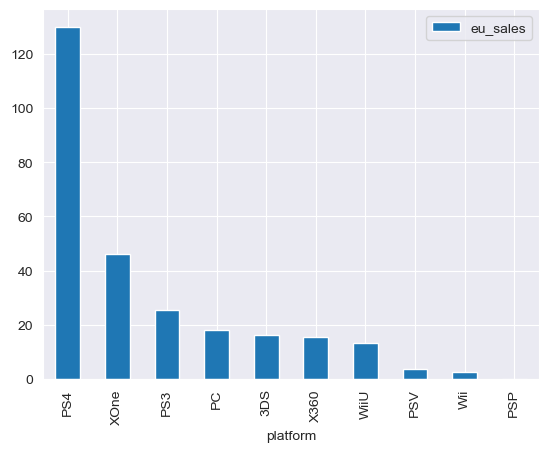

In [52]:
platforms_eu = data_act.pivot_table(index='platform', values = 'eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
platforms_eu.plot(kind='bar', grid = True)
plt.show()

In the EU region also the PS4 and XOne are in 1st and 2nd place. The PSP is also no longer popular.

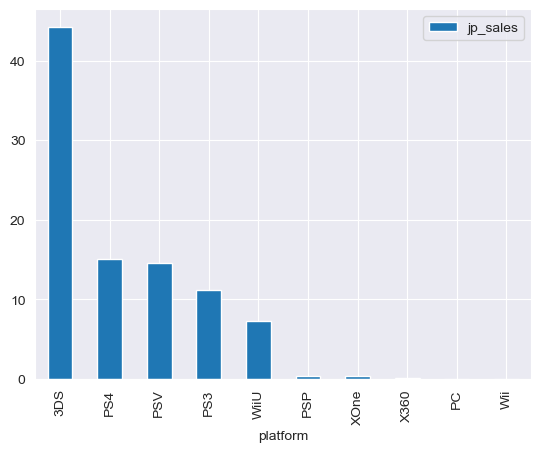

In [53]:
platforms_jp = data_act.pivot_table(index='platform', values = 'jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
platforms_jp.plot(kind='bar', grid = True)
plt.show()

In the JP region, however, the first three places are shared between the 3DS, PS4 and PSV platforms. The Wii, meanwhile, is the 'last' in demand in the region.

Let us now visualise the popularity of genres among users in the NA, EU, JP regions.

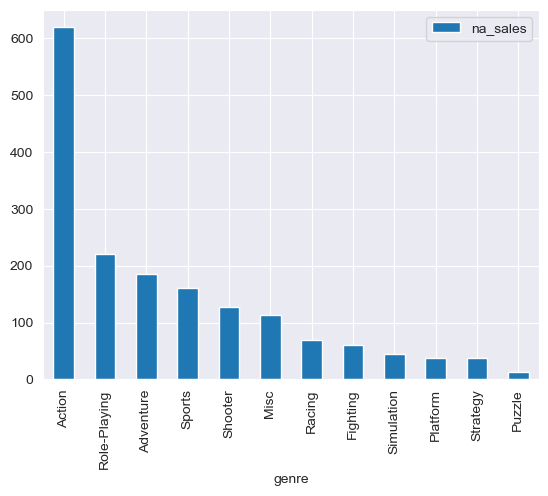

In [54]:
genres_na = data_act.pivot_table(index='genre', values = 'na_sales', aggfunc='count').sort_values(by='na_sales',ascending=False)
genres_na.plot(kind='bar', grid = True)
plt.show()

In the NA region, Action, Role-Playing and Adventure are the leading genres. Puzzle is in the outsiders.

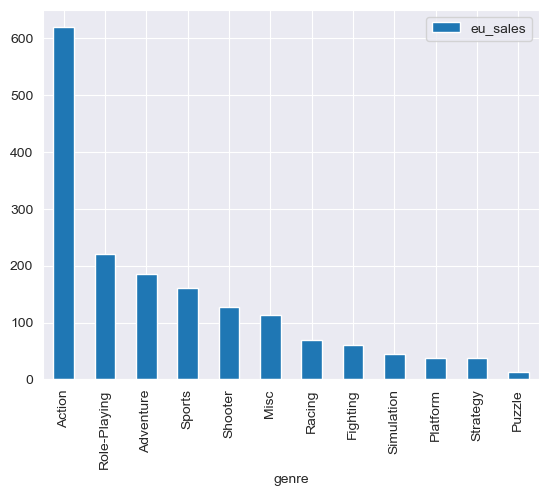

In [55]:
genres_eu = data_act.pivot_table(index='genre', values = 'eu_sales', aggfunc='count').sort_values(by='eu_sales',ascending=False)
genres_eu.plot(kind='bar', grid = True)
plt.show()

In the EU region, the Action, Role-Playing and Adventure genres are also in the lead. Puzzle is again in the outsiders.

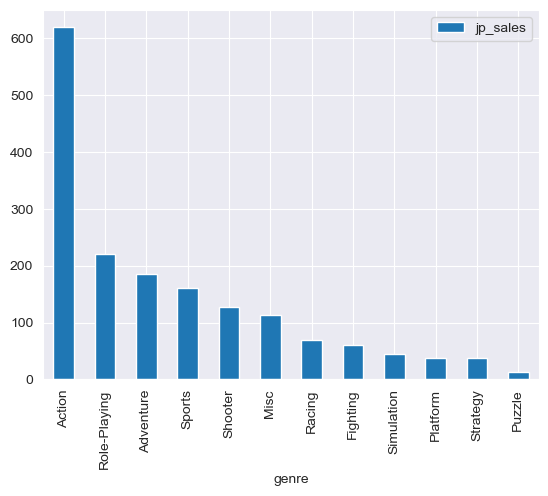

In [56]:
genres_jp = data_act.pivot_table(index='genre', values = 'jp_sales', aggfunc='count').sort_values(by='jp_sales',ascending=False)
genres_jp.plot(kind='bar', grid = True)
plt.show()

In the JP region, the Action, Role-Playing, Adventure genres again lead the way, with Puzzle in the outsiders.

Now let's look at the distribution of sales by region according to the rankings. 

In [57]:
data_act.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'])

,eu_sales,jp_sales,na_sales
rating,,,
E,0.265114,0.040822,0.231689
E10+,0.141405,0.024108,0.179622
M,0.352604,0.030226,0.363849
T,0.125720,0.054539,0.143727


It can be seen that the highest share of sales for the EU and NA regions was for M-rated games. At the same time, games rated T had the lowest sales in almost all regions.

## Hypothesis testing

The hypotheses we deal with:
- The average user ratings for Xbox One and PC platforms are the same;
- The average user ratings for the Action and Sports genres are different.

*Hypothesis 1*.

Let's formulate the null hypothesis and the alternative hypothesis:\
**H0:** average user rating of Xbox One platform equals average user rating of PC platform\
**H1:** Average user rating of Xbox One platform is NOT equal to average user rating of PC platform

Let's take the significance level at 95%.

In [59]:
alpha =.05

sample_1 = data_act.query('platform == "XOne"').pivot_table(index='name', values='user_score')
sample_2 = data_act.query('platform == "PC"').pivot_table(index='name', values='user_score')

results_1 = st.ttest_ind(
    sample_1, 
    sample_2, equal_var = False)

print('p-value:', results_1.pvalue)

if results_1.pvalue < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

p-value: [0.11601398]
Failed to reject H0


Based on the results of the hypothesis test of equality between the averages of the two general populations, we can conclude that we cannot reject the null hypothesis and therefore allow for the possibility of equality between the average user ratings for the Xbox One and PC platforms.

*Hypothesis 2*.

Let's formulate the null hypothesis and the alternative hypothesis:\
**H0:** Average user rating of Action genre is equal to average user rating of Sports genre\
**H1:** Average Action user rating is NOT equal to average Sports user rating

Let's take the level of significance to be 95%.

In [60]:
alpha =.05

sample_1 = data_act.query('genre == "Action"').pivot_table(index='name', values='user_score')
sample_2 = data_act.query('genre == "Sports"').pivot_table(index='name', values='user_score')

results_1 = st.ttest_ind(
    sample_1, 
    sample_2, equal_var = False)

print('p-value:', results_1.pvalue)

if results_1.pvalue < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

p-value: [4.07725312e-07]
Reject H0


Based on the results of the second hypothesis test on the equality of the averages of the two general populations, we can conclude that we reject the null hypothesis and therefore cannot say that the average user rating for the Sports and Action genres are equal.

## Conclusion

As a result of this analysis, the following interesting observations can be highlighted:


- Firstly, what is interesting is that most games have a median life of 10 years each.
- The most profitable platforms have a lower median than the rest, suggesting a large number of 'outliers'.
- For none of the "top" platforms in terms of sales, there is a correlation between customer and critical reviews with overall sales.
- The top 3 genres by number of games are Action, Role-Playing and Adventure.
- With Shooter, Sports and Platform genres being the most profitable. The least profitable genres are Adventure, Puzzle and Strategy
- In terms of user portrait we can observe the following:

    * In the NA region: the user prefers Action, Role-Playing, Adventure games on PS4, XOne.\
    * In EU: the user prefers Action, Role-Playing, Adventure games on PS4 and XOne platforms.
    * In JP: User prefers Action, Role-Playing, Adventure games on 3DS, PS4, PSV.\
    (top 3 genres are equally popular in all regions)
- Highest share of sales for EU and NA regions with M rating.  T-rated games had the lowest sales in almost all regions.
- Based on the test results, we cannot claim equality of average user ratings for Xbox One and PC platforms, but we do accept equality of average user ratings for Sports and Action genres.